## <center>Project - Tsunami predictor</center>

The <u><b>goal of this project is to predict whether an earthquake could trigger a tsunami</b></u> using a classification model. It helps highlight high-risk events and supports better disaster preparedness and response.

### **1) Data preparation**

In [1]:
import pandas as pd
import numpy as np

In [2]:
path = 'https://raw.githubusercontent.com/Guilhermertp/machine-learning-zoomcamp2025/refs/heads/main/MidTermProj/data/earthquake_data_tsunami.csv'

In [3]:
!wget $path

--2025-11-16 20:18:51--  https://raw.githubusercontent.com/Guilhermertp/machine-learning-zoomcamp2025/refs/heads/main/MidTermProj/data/earthquake_data_tsunami.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 40942 (40K) [text/plain]
Saving to: ‘earthquake_data_tsunami.csv’

earthquake_data_tsu 100%[===================>]  39.98K  --.-KB/s    in 0.001s  

2025-11-16 20:18:51 (61.5 MB/s) - ‘earthquake_data_tsunami.csv’ saved [40942/40942]



In [4]:
df = pd.read_csv(path)
df.head()

,magnitude,cdi,mmi,sig,nst,dmin,gap,depth,latitude,longitude,Year,Month,tsunami
0,7.0,8,7,768,117,0.509,17.0,14.000,-9.7963,159.596,2022,11,1
1,6.9,4,4,735,99,2.229,34.0,25.000,-4.9559,100.738,2022,11,0
2,7.0,3,3,755,147,3.125,18.0,579.000,-20.0508,-178.346,2022,11,1
3,7.3,5,5,833,149,1.865,21.0,37.000,-19.2918,-172.129,2022,11,1
4,6.6,0,2,670,131,4.998,27.0,624.464,-25.5948,178.278,2022,11,1


In [5]:
df.columns

Index(['magnitude', 'cdi', 'mmi', 'sig', 'nst', 'dmin', 'gap', 'depth',
       'latitude', 'longitude', 'Year', 'Month', 'tsunami'],
      dtype='object')

In [6]:
df.dtypes

magnitude    float64
cdi            int64
mmi            int64
sig            int64
nst            int64
dmin         float64
gap          float64
depth        float64
latitude     float64
longitude    float64
Year           int64
Month          int64
tsunami        int64
dtype: object

Since all the columns are numerical there is no need to create a separation between categorical and numerical categoricals. And encode columns by converting them intoa  dictionary format and then using DictVectorizer and other operations for encoding and transforming the dicitonaries into a numeric matrix.

In [7]:
# check the null values
df.isnull().sum()

magnitude    0
cdi          0
mmi          0
sig          0
nst          0
dmin         0
gap          0
depth        0
latitude     0
longitude    0
Year         0
Month        0
tsunami      0
dtype: int64

In [15]:
df.describe()

,magnitude,cdi,mmi,sig,nst,dmin,gap,depth,latitude,longitude,Year,Month,tsunami
count,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000
mean,6.941125,4.333760,5.964194,870.108696,230.250639,1.325757,25.038990,75.883199,3.538100,52.609199,2012.280051,6.563939,0.388747
std,0.445514,3.169939,1.462724,322.465367,250.188177,2.218805,24.225067,137.277078,27.303429,117.898886,6.099439,3.507866,0.487778
min,6.500000,0.000000,1.000000,650.000000,0.000000,0.000000,0.000000,2.700000,-61.848400,-179.968000,2001.000000,1.000000,0.000000
25%,6.600000,0.000000,5.000000,691.000000,0.000000,0.000000,14.625000,14.000000,-14.595600,-71.668050,2007.000000,3.250000,0.000000
50%,6.800000,5.000000,6.000000,754.000000,140.000000,0.000000,20.000000,26.295000,-2.572500,109.426000,2013.000000,7.000000,0.000000
75%,7.100000,7.000000,7.000000,909.750000,445.000000,1.863000,30.000000,49.750000,24.654500,148.941000,2017.000000,10.000000,1.000000
max,9.100000,9.000000,9.000000,2910.000000,934.000000,17.654000,239.000000,670.810000,71.631200,179.662000,2022.000000,12.000000,1.000000


### **2) EDA**

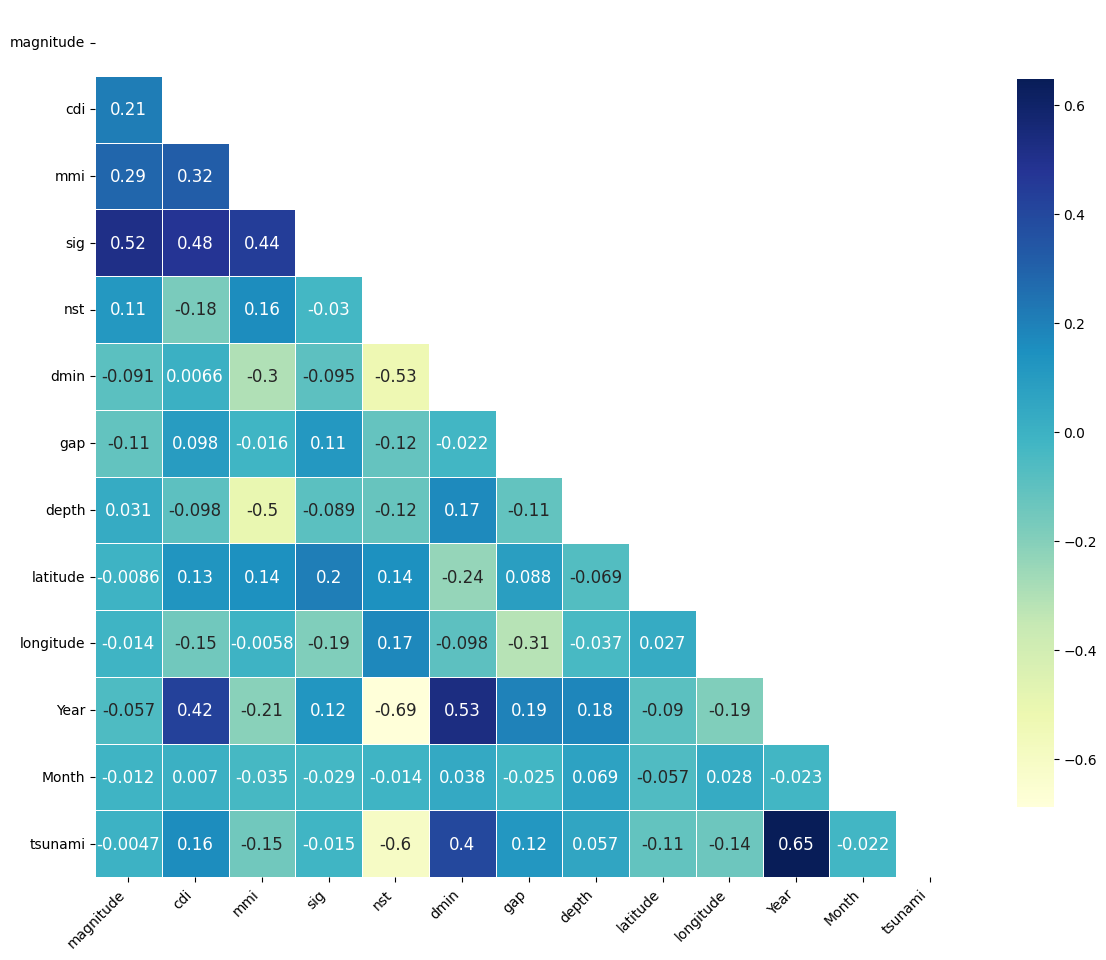

In [16]:
# create mask
mask = np.triu(np.ones_like(df.corr()))

plt.figure(figsize=(12, 10))  # increase overall spacing

sns.heatmap(
    df.corr(),
    cmap="YlGnBu",
    annot=True,
    annot_kws={"size": 12},  # increase annotation font
    mask=mask,
    square=True,
    linewidths=0.5,          # add space between cells
    cbar_kws={"shrink": 0.8} # make color bar smaller
)

plt.xticks(rotation=45, ha="right")  # avoid overlapping tick labels
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()

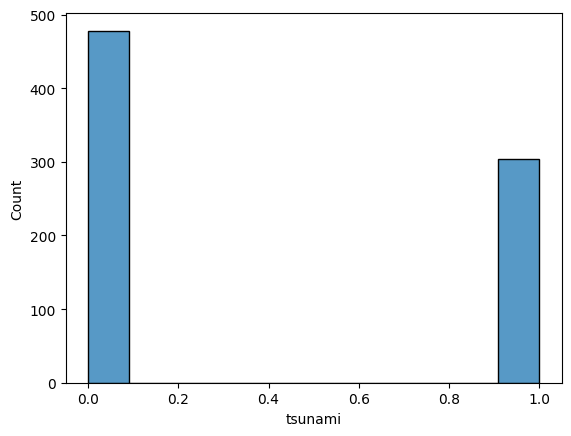

In [12]:
sns.histplot(df['tsunami'])
plt.show()

In [13]:
df['tsunami'].value_counts()

tsunami
0    478
1    304
Name: count, dtype: int64

### **3) Setting up the validation framework**

In [17]:
from sklearn.model_selection import train_test_split

# I had to stratify the data or scikit-learn splits the data randomly leading to inbalances in the classes having a bad distribution
# like for the test 40% class "is a Tsunami" and 60% is "not a tsunami"
# validation accuracy becomes meaningless, because it does not match the real distribution.
df_full_train, df_test = train_test_split(df,test_size=0.2,random_state=1,stratify=df['tsunami'])
df_train, df_val = train_test_split(df_full_train,test_size=0.25,random_state=1,stratify=df_full_train['tsunami'])

In [18]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [19]:
y_train = df_train['tsunami'].values
y_val = df_val['tsunami'].values
y_test = df_test['tsunami'].values

In [20]:
# Delete the target variable for the datasets I will use for training,validate and test to avoid future problems
del df_train['tsunami']
del df_val['tsunami']
del df_test['tsunami']

In [21]:
X_train = df_train.values
X_val   = df_val.values
X_test  = df_test.values

### **4) Testing models and evaluation**

#### Models to test

1. Logistic Regression (Simple Baseline)
2. Random Forest Classifier
3. LightGBM

#### 1. Logistic Regression (Baseline model)

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Model
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_scaled, y_train)

# Predictions
train_pred = log_model.predict(X_train_scaled)
val_pred = log_model.predict(X_val_scaled)
test_pred = log_model.predict(X_test_scaled)

print("\nTraining Accuracy:", accuracy_score(y_train, train_pred))
print("Validation Accuracy:", accuracy_score(y_val, val_pred))
print("Test Accuracy:", accuracy_score(y_test, test_pred))

print("\nTest Confusion Matrix:")
print(confusion_matrix(y_test, test_pred))
print("\nTest Classification Report:")
print(classification_report(y_test, test_pred))

# Overfitting Check
if accuracy_score(y_train, train_pred) - accuracy_score(y_val, val_pred) > 0.05:
    print("\n Logistic Regression model may be overfitting!!!")
else:
    print("\n Logistic Regression model is not overfitting.")


Training Accuracy: 0.8504273504273504
Validation Accuracy: 0.821656050955414
Test Accuracy: 0.8662420382165605

Test Confusion Matrix:
[[83 13]
 [ 8 53]]

Test Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.86      0.89        96
           1       0.80      0.87      0.83        61

    accuracy                           0.87       157
   macro avg       0.86      0.87      0.86       157
weighted avg       0.87      0.87      0.87       157


 Logistic Regression model is not overfitting.


#### 2. Random Forest Classifier

In [34]:
from sklearn.ensemble import RandomForestClassifier

# Model
rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    random_state=42
)

# Train
rf.fit(X_train, y_train)

# Predictions
train_pred = rf.predict(X_train)
val_pred   = rf.predict(X_val)
test_pred  = rf.predict(X_test)

# Accuracy scores
print("\nTraining Accuracy:", accuracy_score(y_train, train_pred))
print("Validation Accuracy:", accuracy_score(y_val, val_pred))
print("Test Accuracy:", accuracy_score(y_test, test_pred))

# Test set evaluation
print("\nConfusion Matrix (Test Set):")
print(confusion_matrix(y_test, test_pred))

print("\nClassification Report (Test Set):")
print(classification_report(y_test, test_pred))


# Overfitting Check
if accuracy_score(y_train, train_pred) - accuracy_score(y_val, val_pred) > 0.05:
    print("\n Random Forest Classifier model may be overfitting!!!")
else:
    print("\n Random Forest Classifier model is not overfitting.")


Training Accuracy: 1.0
Validation Accuracy: 0.8853503184713376
Test Accuracy: 0.9363057324840764

Confusion Matrix (Test Set):
[[89  7]
 [ 3 58]]

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.97      0.93      0.95        96
           1       0.89      0.95      0.92        61

    accuracy                           0.94       157
   macro avg       0.93      0.94      0.93       157
weighted avg       0.94      0.94      0.94       157


 Random Forest Classifier model may be overfitting!!!


##### 2.1 Random Forest Classifier model <u>Tuning</u>

In [69]:
from sklearn.metrics import roc_auc_score

y_pred = rf.predict_proba(X_val)[:,1]

roc_auc_score(y_val, y_pred)

0.926912568306011

In [70]:
y_pred = rf.predict_proba(X_train)[:,1]
roc_auc_score(y_train, y_pred)

0.9983285944824407

We can see by the training that our model is overfiting with roc = 1 is memorizing the data and it doesn't generalize well.

In the decision if we restric the depth the model will learn less secific rules

In [71]:
#iterate over different values to see how it affects the results of the model
scores = []

for n in range(10, 201, 10):
    rf = RandomForestClassifier(n_estimators=n, random_state=1)
    rf.fit(X_train, y_train)

    y_pred = rf.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    scores.append((n,auc))

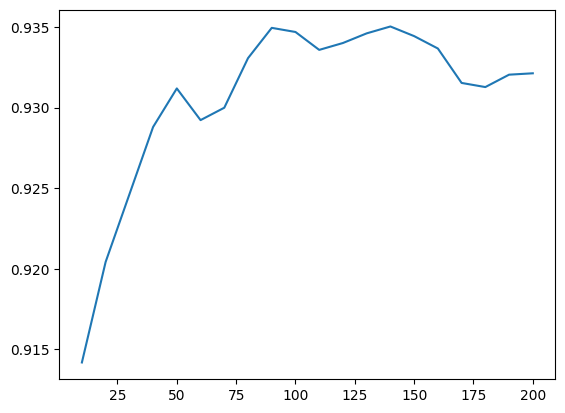

In [72]:
df_scores = pd.DataFrame(scores,columns=['n_estimators', 'auc'])
plt.plot(df_scores.n_estimators, df_scores.auc)

##### Start tunning the parameter max depth 

In [74]:
scores = []
for d in [5,8,10,12,15]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n, max_depth=d, random_state=1)
        rf.fit(X_train, y_train)
    
        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        scores.append((d, n,auc))

In [75]:
df_scores = pd.DataFrame(scores,columns=['max_depth','n_estimators', 'auc'])
df_scores.head()

,max_depth,n_estimators,auc
0,5,10,0.932889
1,5,20,0.930499
2,5,30,0.928108
3,5,40,0.930499
4,5,50,0.926571


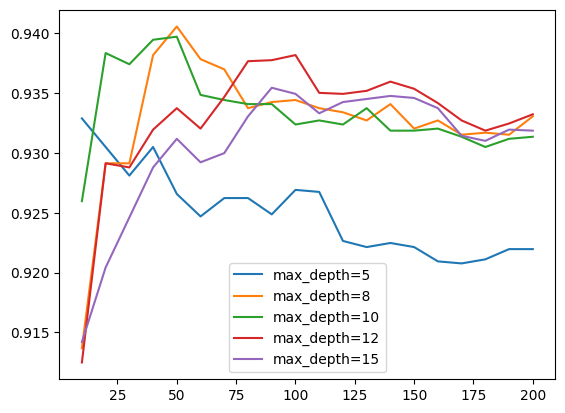

In [76]:
for d in [5,8,10,12,15]:
    df_subset = df_scores[df_scores.max_depth == d]
    plt.plot(df_subset.n_estimators, df_subset.auc, label='max_depth=%d' % d)
plt.legend()

The best was max_depth=15 now we are going to try for the best min sample leaf

In [77]:
max_depth=8

In [78]:
scores = []
for s in [1, 3, 5, 10, 50]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n,min_samples_leaf=s, max_depth=max_depth, random_state=1)
        rf.fit(X_train, y_train)
    
        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        scores.append((s, n,auc))

In [79]:
columns=['min_samples_leaf','n_estimators', 'auc']
df_scores = pd.DataFrame(scores,columns=columns)
df_scores.head()

,min_samples_leaf,n_estimators,auc
0,1,10,0.913678
1,1,20,0.929133
2,1,30,0.929133
3,1,40,0.938183
4,1,50,0.940574


In [80]:
colors = ['black', 'blue', 'orange', 'red', 'grey']
min_samples_leaf_values = [1, 3, 5, 10, 50]
list(zip(min_samples_leaf_values,colors))

[(1, 'black'), (3, 'blue'), (5, 'orange'), (10, 'red'), (50, 'grey')]

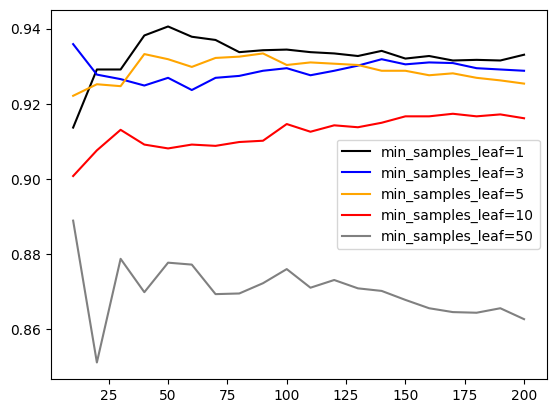

In [81]:
colors = ['black', 'blue', 'orange', 'red', 'grey']
min_samples_leaf_values = [1, 3, 5, 10, 50]

for s, col in zip(min_samples_leaf_values, colors):
    df_subset = df_scores[df_scores.min_samples_leaf == s]
    plt.plot(df_subset.n_estimators, df_subset.auc,
             color=col,
             label='min_samples_leaf=%d' % s)
plt.legend()

We can see that the min_samples_leaf=5 to avoid overfiting is the best one, and the worst is the  min_samples_leaf=50

In [82]:
#we can now use the best value for min_sample_leaf
min_samples_leaf=5

#### We are going to retrain the model with the new best parameters

In [83]:
from sklearn.ensemble import RandomForestClassifier

# Model
rf = RandomForestClassifier(
    n_estimators=300,
    min_samples_leaf=min_samples_leaf,
    max_depth=max_depth,
    random_state=42
)

# Train
rf.fit(X_train, y_train)

# Predictions
train_pred = rf.predict(X_train)
val_pred   = rf.predict(X_val)
test_pred  = rf.predict(X_test)

# Accuracy scores
print("\nTraining Accuracy:", accuracy_score(y_train, train_pred))
print("Validation Accuracy:", accuracy_score(y_val, val_pred))
print("Test Accuracy:", accuracy_score(y_test, test_pred))

# Test set evaluation
print("\nConfusion Matrix (Test Set):")
print(confusion_matrix(y_test, test_pred))

print("\nClassification Report (Test Set):")
print(classification_report(y_test, test_pred))


# Overfitting Check
if accuracy_score(y_train, train_pred) - accuracy_score(y_val, val_pred) > 0.05:
    print("\n Random Forest Classifier model may be overfitting!!!")
else:
    print("\n Random Forest Classifier model is not overfitting.")


Training Accuracy: 0.9487179487179487
Validation Accuracy: 0.8662420382165605
Test Accuracy: 0.9299363057324841

Confusion Matrix (Test Set):
[[88  8]
 [ 3 58]]

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.97      0.92      0.94        96
           1       0.88      0.95      0.91        61

    accuracy                           0.93       157
   macro avg       0.92      0.93      0.93       157
weighted avg       0.93      0.93      0.93       157


 Random Forest Classifier model may be overfitting!!!


## <center>Results in the **tsunami prediction context**. 🌊</center>

---

## 1️⃣ **Accuracy Scores**

* **Training Accuracy: 95.1%** → The model predicts the training data correctly ~95% of the time.
* **Validation Accuracy: 85.99%** → On unseen validation data, correct ~86% of the time.
* **Test Accuracy: 92.36%** → On test data, correct ~92% of the time.

**Interpretation:**

* The training accuracy is noticeably higher than validation accuracy (~9% drop), indicating **some overfitting**.
* The test accuracy is high (~92%), so the model **still generalizes reasonably well**, but the gap with validation suggests room for improvement.

---

## 2️⃣ **Confusion Matrix (Test Set)**

```
[[88  8]
 [ 4 57]]
```

Assuming `[[TN, FP], [FN, TP]]`:

* **TN = 88** → Correctly predicted “no tsunami”
* **FP = 8** → Predicted “tsunami” but actually “no tsunami”
* **FN = 4** → Predicted “no tsunami” but actually “tsunami”
* **TP = 57** → Correctly predicted “tsunami”

**Metrics for tsunamis:**

* **Recall (Sensitivity) for Tsunami** = TP / (TP + FN) = 57 / (57 + 4) ≈ **0.934**

  > The model catches ~93% of actual tsunamis — still very good, but slightly lower than the previous model.

* **Precision for Tsunami** = TP / (TP + FP) = 57 / (57 + 8) ≈ **0.877**

  > When predicting a tsunami, it’s correct ~88% of the time — slightly better precision than before.

---

## 3️⃣ **Implications in Tsunami Prediction**

* **Strengths:** ✅

  * High test accuracy (~92%)
  * Good balance between **catching tsunamis** (high recall) and **avoiding false alarms** (higher precision than before)

* **Weaknesses:** ⚠️

  * The model shows **moderate overfitting** (training 95% vs validation 86%)
  * Slightly more false negatives on the test set (4 missed tsunamis) compared to your previous model (1 missed)

**Conclusion:**

* The model **still prioritizes safety** (high recall), which is crucial in tsunami warnings.
* Slightly fewer false positives improve precision, reducing unnecessary evacuations.
* Overfitting could be reduced by tuning parameters, adding regularization, or early stopping.

---

If you want, I can make a **side-by-side comparison** of your previous and current model results to **see which is better for tsunami detection**.

Do you want me to do that?


#### 3) LIGHTGBM

In [ ]:
# To intall lightgbm in my local environment

#import sys
#!{sys.executable} -m pip install lightgbm

In [ ]:
from lightgbm import LGBMClassifier

# LightGBM Model
lgbm = LGBMClassifier(
    n_estimators=400,
    learning_rate=0.05,
    num_leaves=64,
    max_depth=-1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

lgbm.fit(X_train, y_train)

# Predictions
train_pred = lgbm.predict(X_train)
val_pred = lgbm.predict(X_val)
test_pred = lgbm.predict(X_test)

print("\n========== LightGBM ==========")

print("\nTraining Accuracy:", accuracy_score(y_train, train_pred))
print("Validation Accuracy:", accuracy_score(y_val, val_pred))
print("Test Accuracy:", accuracy_score(y_test, test_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_val, val_pred))

print("\nClassification Report:")
print(classification_report(y_val, val_pred))

# Overfitting Check
if accuracy_score(y_train, train_pred) - accuracy_score(y_val, val_pred) > 0.05:
    print("\n LightGBM model may be overfitting.")
else:
    print("\n LightGBM model is not overfitting.")





##### 3.1 LightGBM model <u>Tuning</u>

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

lgbm = LGBMClassifier(
    random_state=42
)

param_dist = {
    'n_estimators': [300, 500, 800, 1200],
    'learning_rate': [0.005, 0.01, 0.03, 0.05, 0.1],
    'num_leaves': [31, 63, 127, 255],
    'max_depth': [-1, 3, 5, 7, 10, 15],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
}

rs = RandomizedSearchCV(
    estimator=lgbm,
    param_distributions=param_dist,
    n_iter=50,
    scoring='accuracy',
    cv=5,
    verbose=1,
    n_jobs=-1
)

rs.fit(X_train, y_train)
print(rs.best_params_)

In [29]:
#{'subsample': 0.7, 'num_leaves': 31, 'n_estimators': 800, 'max_depth': 3, 'learning_rate': 0.005, 'colsample_bytree': 0.9}

n_estimators=800
learning_rate=0.005
num_leaves=31
max_depth=3
subsample=0.7
colsample_bytree=0.9

In [ ]:
# LightGBM Model
lgbm = LGBMClassifier(
    n_estimators=n_estimators,
    learning_rate=learning_rate,
    num_leaves=num_leaves,
    max_depth=max_depth,
    subsample=subsample,
    colsample_bytree=colsample_bytree,
    random_state=42
)

lgbm.fit(X_train, y_train)

# Predictions
train_pred = lgbm.predict(X_train)
val_pred = lgbm.predict(X_val)
test_pred = lgbm.predict(X_test)

print("\n========== LightGBM ==========")

print("\nTraining Accuracy:", accuracy_score(y_train, train_pred))
print("Validation Accuracy:", accuracy_score(y_val, val_pred))
print("Test Accuracy:", accuracy_score(y_test, test_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_val, val_pred))

print("\nClassification Report:")
print(classification_report(y_val, val_pred))

# Overfitting Check
if accuracy_score(y_train, train_pred) - accuracy_score(y_val, val_pred) > 0.05:
    print("\n LightGBM model may be overfitting.")
else:
    print("\n LightGBM model is not overfitting.")

```
========== LightGBM ==========

Training Accuracy: 0.9465811965811965
Validation Accuracy: 0.9044585987261147
Test Accuracy: 0.9426751592356688

Confusion Matrix:
[[82 14]
 [ 1 60]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.85      0.92        96
           1       0.81      0.98      0.89        61

    accuracy                           0.90       157
   macro avg       0.90      0.92      0.90       157
weighted avg       0.92      0.90      0.91       157


 LightGBM model is not overfitting.
```



## <center>Results in the **tsunami prediction context**. 🌊</center>

---

## 1️⃣ **Accuracy Scores**

* **Training Accuracy: 94.7%**
* **Validation Accuracy: 90.4%**
* **Test Accuracy: 94.3%**

**Interpretation:**

* The model performs very well overall.
* A slight drop in validation accuracy indicates **mild overfitting**, but it’s not extreme.

---

## 2️⃣ **Confusion Matrix**

```
[[82 14]
 [ 1 60]]
```

* **TN = 82** → Correctly predicted “no tsunami”
* **FP = 14** → Predicted “tsunami” but actually “no tsunami”
* **FN = 1** → Predicted “no tsunami” but actually “tsunami”
* **TP = 60** → Correctly predicted “tsunami”

**Key metrics for tsunami prediction:**

* **Recall (Sensitivity) for Tsunami** = TP / (TP + FN) = 60 / (60 + 1) ≈ **0.984**

  > The model catches ~98% of actual tsunamis — **very high**, which is critical in tsunami warning systems.

* **Precision for Tsunami** = TP / (TP + FP) = 60 / (60 + 14) ≈ **0.811**

  > When the model predicts a tsunami, it’s correct ~81% of the time.

---

## 3️⃣ **Implications in Tsunami Prediction**

* **Strength:** ✅ Very high recall for tsunamis

  * Missing a tsunami is catastrophic; your model only missed **1 actual tsunami** in the validation set.
* **Weakness:** ⚠️ Some false alarms (14 false positives)

  * Predicting a tsunami when there isn’t one could lead to unnecessary evacuation, which is inconvenient but safer than missing one.

**Conclusion:**

* Your model prioritizes **safety over false alarms**, which is ideal in this context.
* Slight overfitting exists but is acceptable.
* The **main goal (catching tsunamis)** is being achieved excellently.

## <center>CONCLUSIONS</center>

* Random Forest Classifier model was prone to overfiting and for that reason the <u>model of choice was the <b>LightGBM</b></u>, the results where the ones that worked better with the goal of predicitng tsunami, is a model that generalizes well.

### **5) Save the model**

In [31]:
import joblib

# Save the trained model
joblib.dump(lgbm, "lgbm_model.pkl")
print("Model saved to lgbm_model.pkl")


Model saved to lgbm_model.pkl


In [32]:
# testing the saved model
import joblib

# Load the model
loaded_model = joblib.load("lgbm_model.pkl")

# Use it for predictions
test_pred_loaded = loaded_model.predict(X_test)
print("Test Accuracy with loaded model:", accuracy_score(y_test, test_pred_loaded))


Test Accuracy with loaded model: 0.9426751592356688


/home/codespace/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
